In [66]:
import numpy as np
import pandas as pd
import random
random.seed(40)

In [67]:
#função que gera os pontos
def gera_pontos(qtd, a, b):
  x = []
  for i in range(qtd):
    x.append(random.uniform(a, b))
  return x

In [68]:
qtd_pontos = 1000

In [69]:
x1 = gera_pontos(qtd_pontos, -4*np.pi, 4*np.pi)
x2 = gera_pontos(qtd_pontos, -4*np.pi, 4*np.pi)
print(x1)
print(x2)

[-1.040326861580123, 9.496856243310791, -11.765981263194766, -5.468227366851717, 11.606077975301506, 4.12978023207835, -9.340021072719004, -3.810394181202911, 9.544141354507719, -1.4888077840494258, -11.846769304733371, 9.957131413016903, -9.302279135004817, 3.550403814481786, 3.0053695995294873, -0.9885691906206198, 11.610953572961485, -8.129123185612379, 2.6325262449497, -9.711196395023102, 11.701748733304374, -8.92698307245891, 0.32803083356125384, 8.35955142714803, 9.632115907810046, -10.11426479793662, 9.482235587254657, 8.611757998360542, -4.630365063190876, 6.44599668302871, -6.859406551370307, -8.700403599756369, -8.479695520669239, -4.806747019450764, 8.199504494390201, -0.9595400395821478, 12.29089731794296, 9.898335466668971, -7.2769126501204955, -1.6733978608630586, -10.947864494472435, 2.10412845360705, 2.74642646824174, 2.144368448074678, -10.339531326040953, 2.7988888189194974, -9.744849045937588, 8.570750867785478, -0.971438189816034, -10.07097420777623, 12.027365238522

In [70]:
#função utiulizada para gerar os gráficos
def funcao_a(x1,x2):
  return 1 if (x1== 0 and x2 == 0) else\
   (np.sin(x1*np.pi)/(x1*np.pi)) if (x1 != 0 and x2 == 0) else\
   (np.sin(x2*np.pi)/(x2*np.pi)) if (x1 == 0 and x2 != 0) else\
   (np.sin(x1*np.pi)/(x1*np.pi))*(np.sin(x2*np.pi)/(x2*np.pi))

In [71]:
fx1x2_a = []
for i in range(qtd_pontos):
  fx1x2_a.append(funcao_a(x1[i], x2[i]))

print(fx1x2_a)

[0.005937224568807461, -0.00738760874869078, 0.0005402862104655188, -0.0013875689475989397, 0.0007308405246386231, 0.0002653409763492205, -0.00018582866231559882, -0.0007858420266208258, -0.0033171563057539347, -0.0038310869874311074, -0.000863575898909945, -0.00013874989893680314, -0.00044827627490476464, 0.003760647090221261, 9.526874770536228e-05, -0.000727720033315429, -0.000650298518727659, 0.0019507641945404684, 0.003091233951624431, -0.0009540416906365699, -9.790900423601452e-05, -0.0004467781515891635, 0.029452461075329853, 0.0010439304203784614, -0.0006512997811538497, 0.000723283384000474, 0.0019289187104650552, -0.00044581178166101413, 0.06238956384184413, -0.0013284589028409346, -0.00015160607406487198, -0.0006945807556714031, -7.588519062410909e-05, -0.0011314900414554343, 0.002921650068017138, 4.660386566696574e-05, 0.0004657287764038356, -0.010077989296024445, 0.0003888892896611932, -0.004285533852214679, -6.280173057824437e-05, 0.0012600681277727874, 0.00461097993956431

In [72]:
df = {"x1": x1, "x2": x2, "target": fx1x2_a}
df = pd.DataFrame(df)
df

,x1,x2,target
0,-1.040327,1.195742,0.005937
1,9.496856,-0.810358,-0.007388
2,-11.765981,7.742201,0.000540
3,-5.468227,-10.701932,-0.001388
4,11.606078,-9.308628,0.000731
...,...,...,...
995,-8.478093,5.108673,-0.000781
996,-3.938328,10.049467,-0.000076
997,-5.397103,5.199307,0.002006
998,-2.177044,-1.910061,-0.003587


In [73]:
#separa os atributos e o alvo
X = df.iloc[:, 0 : df.shape[1] - 1]
Y = df.iloc[:, df.shape[1] - 1 : ]

In [74]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [75]:
#Separando dados de treinamento e teste
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(X, Y, test_size=0.3, random_state=40)

In [76]:
#Criação do modelo de rede neural para uma regressão
model = keras.Sequential([layers.Dense(100, activation='relu', input_shape=[len(X.keys())]),
    layers.Dense(100, activation='relu'),
    layers.Dense(1)
])

optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mae', 'mse'])


In [77]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 100)               300       
                                                                 
 dense_10 (Dense)            (None, 100)               10100     
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                                 
Total params: 10,501
Trainable params: 10,501
Non-trainable params: 0
_________________________________________________________________


In [78]:
previsoes = model.predict(x_teste)

In [79]:
history = model.fit(X, Y, epochs=100, validation_split = 0.3, verbose=0)

In [80]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,0.058781,0.144758,0.058781,0.002533,0.038173,0.002533,0
1,0.023193,0.091812,0.023193,0.013938,0.106731,0.013938,1
2,0.027946,0.130851,0.027946,0.010329,0.075328,0.010329,2
3,0.029771,0.129341,0.029771,0.005894,0.055171,0.005894,3
4,0.023687,0.118940,0.023687,0.012202,0.097881,0.012202,4
...,...,...,...,...,...,...,...
95,0.000396,0.013340,0.000396,0.001320,0.025618,0.001320,95
96,0.000459,0.014958,0.000459,0.001020,0.013491,0.001020,96
97,0.000392,0.013528,0.000392,0.000906,0.016320,0.000906,97
98,0.000406,0.013535,0.000406,0.000794,0.013836,0.000794,98


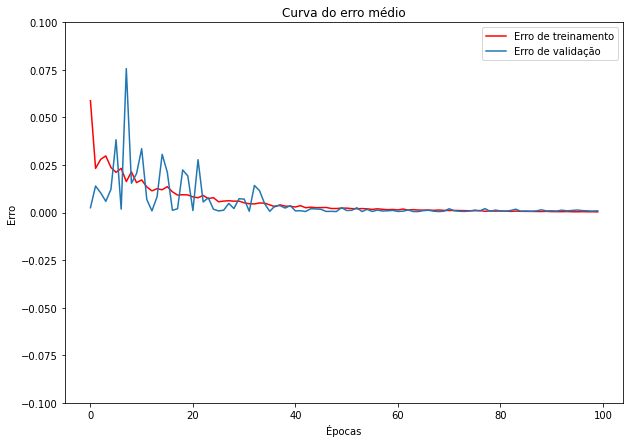

In [81]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(10,7))
  plt.xlabel('Épocas')
  plt.ylabel('Erro')
  plt.title("Curva do erro médio")
  plt.plot(hist['epoch'], hist['mse'], color="red", 
           label='Erro de treinamento')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Erro de validação')
  plt.ylim([-0.1,0.1])
  plt.legend()
  plt.savefig('erro.png', format='png')
  plt.show()

plot_history(history)


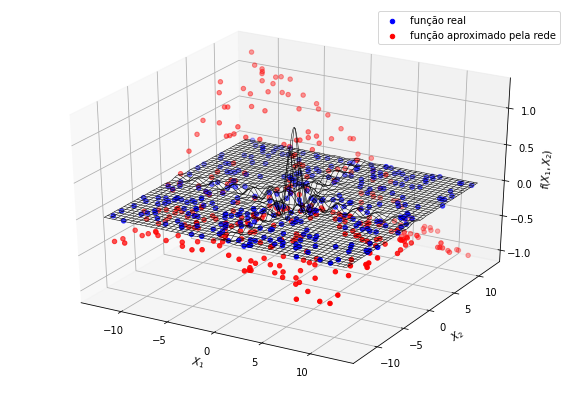

In [82]:
fig2 = plt.figure(figsize=(10,7))
ax = fig2.add_subplot(projection='3d')

ax.scatter(x_teste.iloc[:, 0 : 1], x_teste.iloc[:, 1 : 2], y_teste, color='blue', label = 'função real')
ax.scatter(x_teste.iloc[:, 0 : 1], x_teste.iloc[:, 1 : 2], previsoes, color='red', label = 'função aproximado pela rede')
ax.set_xlabel('$X_{1}$')
ax.set_ylabel('$X_{2}$')
ax.set_zlabel('$f(X_{1},X_{2})$')

range_xy = np.arange(-4*np.pi, 4*np.pi, 0.05)
malha_x, malha_y = np.meshgrid(range_xy, range_xy)
malha_z = np.ndarray((malha_x.shape[1], malha_y.shape[1]))

for i in range(len(range_xy)):
  for j in range(len(range_xy)):
    malha_z[i][j] = funcao_a(range_xy[i], range_xy[j])

ax.plot_wireframe(malha_x, malha_y, malha_z, linewidths=0.5, color='black')
ax.legend()
plt.savefig('fig.png', format='png')
fig2.show()